GOAL: Identify the fraudlent transaction is possible.

1) step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

2) type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

3) amount - amount of the transaction in local currency.

4) nameOrig - customer who started the transaction

5) oldbalanceOrg - initial balance before the transaction

6) newbalanceOrig - new balance after the transaction

7) nameDest - customer who is the recipient of the transaction

8) oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

# IMPORT THE LIBRARIES

In [1]:
#EDA
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
#MODEL ALGORITHMS        
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix,roc_auc_score
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
## to ignore waarning
import warnings
warnings.filterwarnings("ignore")#, category=DeprecationWarning)

# LOAD THE DATASET

In [2]:
df = pd.read_csv("Fraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# EDA

1) Data Description

In [3]:
print("Number of records:\t\t",df.shape[0])
print("Number of features per record:\t",df.shape[1])

Number of records:		 1048575
Number of features per record:	 11


In [4]:
df['isFlaggedFraud'].unique()

array([0], dtype=int64)

In [5]:
df['isFlaggedFraud'].value_counts()

0    1048575
Name: isFlaggedFraud, dtype: int64

In [6]:
df['isFraud'].unique()

array([0, 1], dtype=int64)

In [7]:
df['isFraud'].value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

In [8]:
print("No of transactions Flagged as Valid:",df.isFlaggedFraud.value_counts()[0])
#print("No of transactions Flagged as Fraud:",df.isFlaggedFraud.value_counts()[1])

No of transactions Flagged as Valid: 1048575


In [9]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

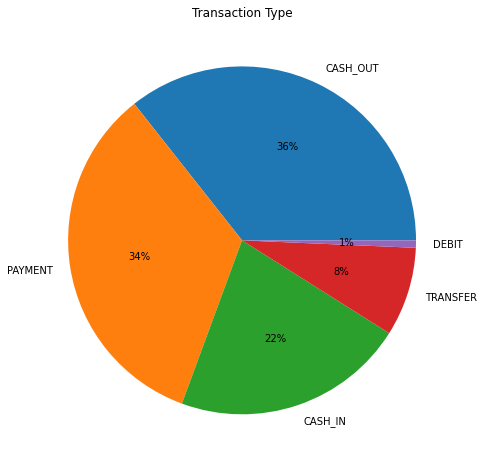

In [10]:
#create pie chart
plt.figure(figsize=(10,8))
plt.pie(df.type.value_counts().values,labels=df.type.value_counts().index,  autopct='%.0f%%')
plt.title("Transaction Type")
plt.show()

+ % of trasactions done which is both fraudent and not fraudent.
+ Through cash_out transactions is done most followed by payment, cash_in, transfer and debit.

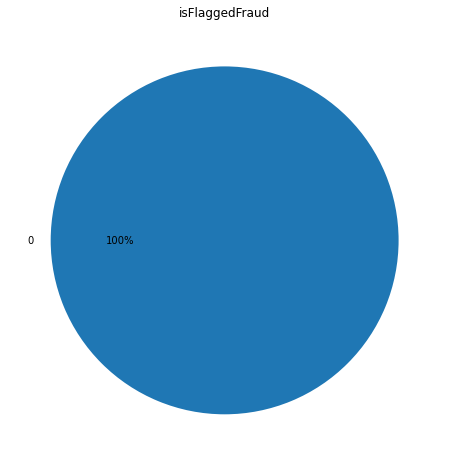

In [11]:
#create pie chart
plt.figure(figsize=(10,8))
plt.pie(df.isFlaggedFraud.value_counts().values,labels=df.isFlaggedFraud.value_counts().index,  autopct='%.0f%%')
plt.title("isFlaggedFraud")
plt.show()

+ from above we come to know that transaction done illegally. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

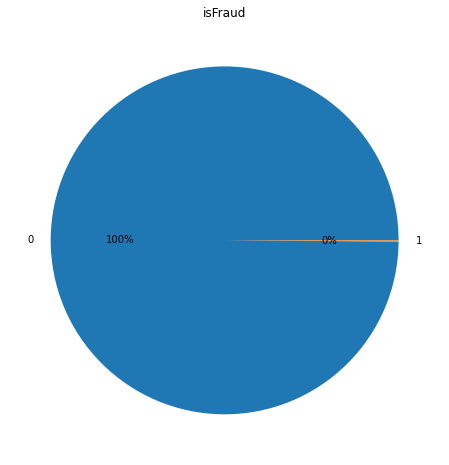

In [12]:
#create pie chart
plt.figure(figsize=(10,8))
plt.pie(df.isFraud.value_counts().values,labels=df.isFraud.value_counts().index,  autopct='%.0f%%')
plt.title("isFraud")
plt.show()

+ from above we come to know that transaction done is tottally fraud and very less has no fraud trasaction.

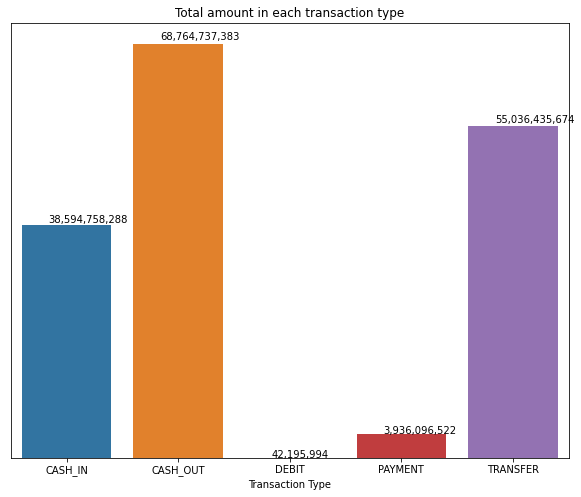

In [13]:
d = df.groupby('type')['amount'].sum()
plt.figure(figsize=(10,8))
ax = sns.barplot(x=d.index,y=d.values)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x()+0.24, p.get_height()*1.01))
    
plt.title("Total amount in each transaction type")
plt.yticks([])
plt.xlabel("Transaction Type")
plt.show()

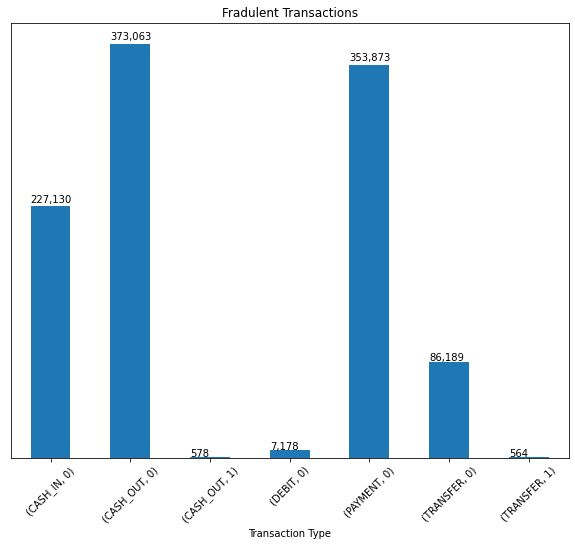

In [14]:
plt.figure(figsize=(10,8))
ax = df.groupby(['type','isFraud']).size().plot(kind='bar')

for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.title("Fradulent Transactions")
plt.xlabel("Transaction Type")
plt.yticks([])
#plt.xticks([' Valid CashOut','Fraud CashOut','Valid Transfer','Fraud Transfer'])
plt.xticks(rotation=45)
plt.show()

1) There is more actaual transaction through cash_out and payment is done.
2) and fraud transaction mostly done throgh cash_out and transfer only.
3) There is no evidence of fraud transaction done through cash_in, payment and debit.

# Label Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['type']=label.fit_transform(df.type)
df['nameOrig']=label.fit_transform(df.nameOrig)
df['nameDest']=label.fit_transform(df.nameDest)

In [16]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,125164,170136.0,160296.36,274917,0.0,0.0,0,0
1,1,3,1864.28,361319,21249.0,19384.72,286716,0.0,0.0,0,0
2,1,4,181.00,165236,181.0,0.00,73550,0.0,0.0,1,0
3,1,1,181.00,961662,181.0,0.00,65464,21182.0,0.0,1,0
4,1,3,11668.14,567915,41554.0,29885.86,138001,0.0,0.0,0,0


# X and Y variables

isFlaggedFraud has no information correctly, so droping it and chosing only isFraud feature as Target column.

In [17]:
drop = ['isFlaggedFraud']
df.drop(drop,axis=1,inplace=True)

In [18]:
X= df.iloc[:,df.columns!='isFraud']
y =df.isFraud

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Selection

In [20]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

mic = SelectKBest(score_func=mutual_info_classif, k='all')
model_mic=mic.fit(x_train, y_train)
features_select = model_mic.transform(x_train)

Feature 0: 0.010743
Feature 1: 0.056940
Feature 2: 0.001974
Feature 3: 0.000002
Feature 4: 0.001573
Feature 5: 0.000649
Feature 6: 0.000847
Feature 7: 0.000188
Feature 8: 0.000091


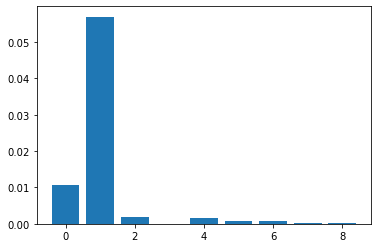

In [21]:
for i in range(len(model_mic.scores_)):
    print('Feature %d: %f' % (i, model_mic.scores_[i]))
    
plt.bar([i for i in range(len(model_mic.scores_))], model_mic.scores_)
plt.show()  

In [22]:
df.head(1)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,125164,170136.0,160296.36,274917,0.0,0.0,0


In [23]:
df.drop(['nameOrig','nameDest'],axis=1,inplace=True)
df.head(1)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0


# Standardization

In [24]:
ss = StandardScaler()

df.amount         = ss.fit_transform(df[['amount']])
df.oldbalanceOrg  = ss.fit_transform(df[['oldbalanceOrg']])
df.oldbalanceDest = ss.fit_transform(df[['oldbalanceDest']])
df.newbalanceOrig = ss.fit_transform(df[['newbalanceOrig']])
df.newbalanceDest = ss.fit_transform(df[['newbalanceDest']])

# Model Building

In [25]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import cross_validate

### Logistic Regression

In [26]:
LR = LogisticRegression()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()

### Descision Tree

In [27]:
decision_tree = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(decision_tree, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()

### Support Vector Machine

### Random Forest

### K Nearest Neighbour

In [28]:
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

### Comparison

In [29]:
models_initial = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbors', ],
    'Fitting time': [LR_fit_time, dtree_fit_time, KNN_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, KNN_score_time,],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, KNN_accuracy,],
    'Precision'   : [LR_precision, dtree_precision,KNN_precision],
    'Recall'      : [LR_recall, dtree_recall, KNN_recall],
    'F1_score'    : [LR_f1, dtree_f1, KNN_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc ,KNN_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_initial.sort_values(by='Accuracy', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
1,Decision Tree,13.792864,0.052120,0.999557,0.902485,0.895129,0.999555,0.895129
2,K-Nearest Neighbors,2.430632,6.774448,0.999261,0.895244,0.723050,0.999155,0.819728
0,Logistic Regression,4.484404,0.058485,0.999219,0.892130,0.700309,0.999089,0.971286


+ On above observations decision tree is showing best model comparision than the others.

# Model saving

In [31]:
import pickle
# saving the model 
pickle_out = open("decision_tree.pkl", mode = "wb") 
pickle.dump(decision_tree, pickle_out) 
pickle_out.close()